 # Converting a grid model from CIM CGMES (v2.4.15) to pandapower


Import the pandapower library and the neccessay methods for the converstion as follows:

In [1]:
import sys
sys.path.append("../")
import pandapower as pp
from pandapower.converter import from_cim

## CIM CGMES to pandapower

First we start by defining the path of the CGMES zip files, which can convert to PandaPower. When using the ENTSO-E test models, make sure to include the Boundary profiles as well. Then call the converter.

In [2]:
cgmes_files = [r'example_cim\CGMES_v2.4.15_SmallGridTestConfiguration_Boundary_v3.0.0.zip',
               r'example_cim\CGMES_v2.4.15_SmallGridTestConfiguration_BaseCase_Complete_v3.0.0.zip']
net = from_cim.from_cim(file_list=cgmes_files)

print('Conversion successful')

C:\ProgramData\Miniconda3\envs\venv_cim2pp_release\lib\site-packages\pandapower-2.10.1-py3.8.egg\pandapower\converter\cim\cim2pp\build_pp_net.py:1849: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self.net.line_geodata.coords[start_index_pp_net:] = line_geo.coords[:]


Conversion successful


## Run the power flow
Once the network is converted to pandapower, we can run a power flow:

In [3]:
pp.runpp(net)
print(net.res_bus.iloc[0:5]) # print first few bus results

      vm_pu  va_degree   p_mw     q_mvar
0  0.974052 -18.213450   39.0  10.000000
1  1.050000  -1.952397 -220.0 -38.767059
2  0.945710  -8.057535   33.0  15.000000
3  0.973778 -18.504162   20.0   9.000000
4  0.966486 -18.585519   90.0  30.000000


## Plot the converted network and visualize results

Preliminary requirements:
* This plotting demo only works if the imported CIM network has geo data (GL profile). If not, you can create generic coordinates using the following instructions:
https://pandapower.readthedocs.io/en/latest/plotting/matplotlib/generic.html and then run the cells below.
* Matplotlib is required (can be installed via conda)

<AxesSubplot: >

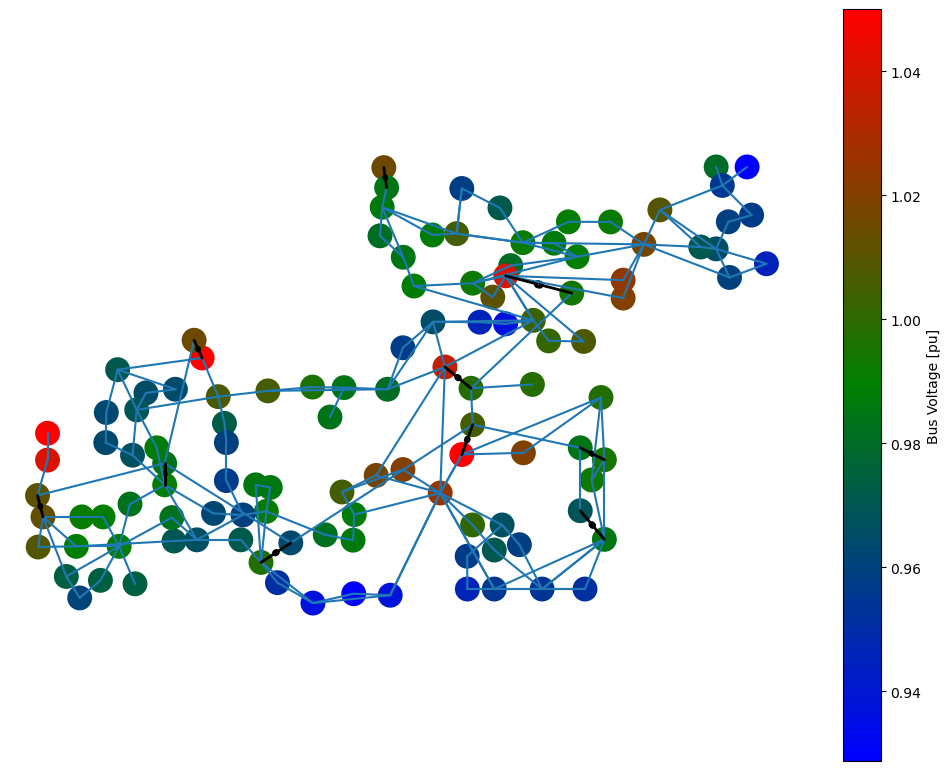

In [4]:
import pandapower.plotting as plt
import pandapower.plotting.colormaps as cmaps

cmap_list = [(0.9, "blue"), (1.0, "green"), (1.1, "red")]
cmap, norm = cmaps.cmap_continuous(cmap_list)

bc = plt.create_bus_collection(net,net.bus.index.values,cmap=cmap)
lc = plt.create_line_collection(net,net.line.index.values,use_bus_geodata=True)
tc = plt.create_trafo_collection(net,net.trafo.index.values)
plt.draw_collections([bc,lc,tc])